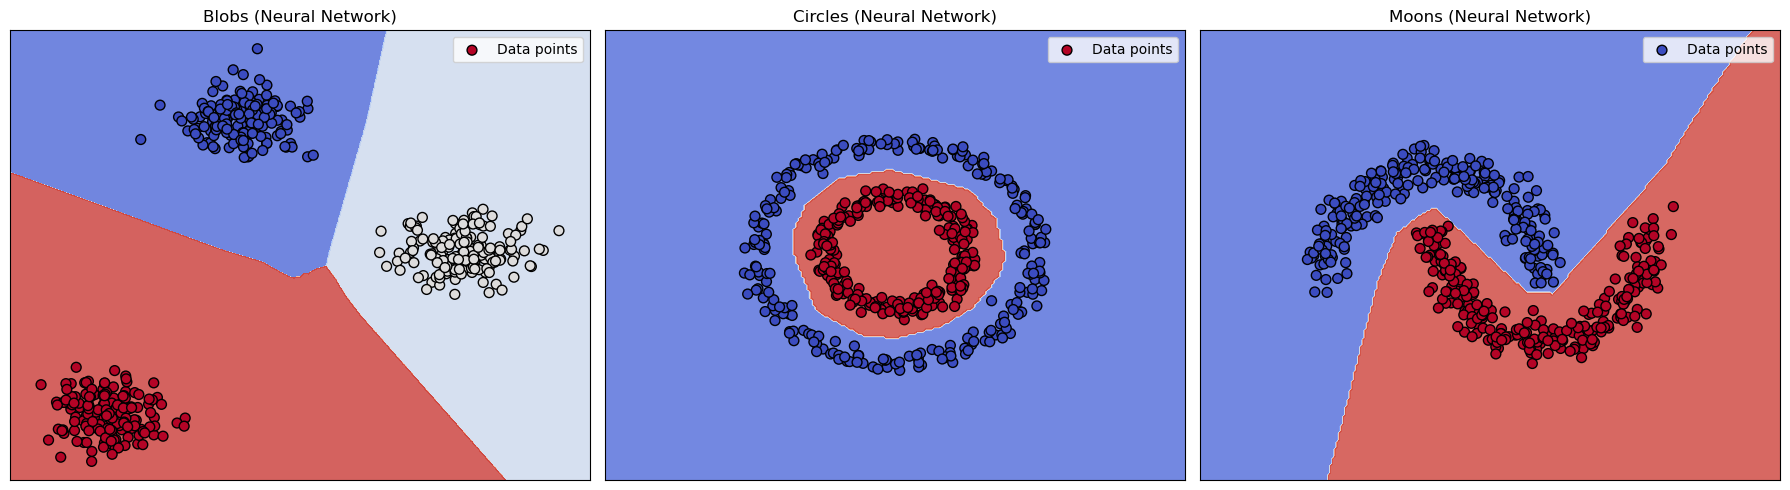

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.neural_network import MLPClassifier

# Generar diferentes conjuntos de datos
n_samples = 500

# Dataset 1: Blobs
X_blobs, y_blobs = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=42)

# Dataset 2: Círculos
X_circles, y_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Dataset 3: Lunas
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.1)

# Lista de datasets para iterar
datasets = [(X_blobs, y_blobs, "Blobs"), (X_circles, y_circles, "Circles"), (X_moons, y_moons, "Moons")]

# Crear la figura para mostrar los resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (X, y, title) in enumerate(datasets):
    # Crear e implementar el modelo de red neuronal
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
    mlp.fit(X, y)
    
    # Crear una malla de puntos para visualizar las fronteras de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # Predecir para cada punto en la malla
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Visualizar la frontera de decisión
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    # Visualizar los puntos originales
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.coolwarm, label='Data points')
    
    ax.set_title(f"{title} (Neural Network)")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()

plt.tight_layout()
plt.show()
